In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
!pip install yfinance
import yfinance as yf # https://pypi.org/project/yfinance/
import math
import random
import seaborn as sns
import datetime
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 39.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [15]:
# get data by ticker-name, start-time & end-time
def get_df_data(ticker_name="AAPL", start_time="2022-01-01", end_time="2022-10-09"):
  df_data = yf.download(tickers=ticker_name, start=start_time, end=end_time) 
  df_data = df_data[ ["Open", "High", "Low", "Close", "Volume"] ]
  df_data['previous_Close'] = df_data['Close'].shift(1)
  df_data['daily_return'] = (df_data['Close']-df_data['previous_Close'])/df_data['previous_Close']
  return df_data

def search_by_index(df_data, index_time):
  tmp_list = list(df_data.index)
  i = 0
  for t in tmp_list:
    if t>=index_time:
      break
    i += 1
  return i-1

def merge_stocks(df_data1, df_data2):
  data = []
  for i in range(len(df_data1)):
        # get the info of target stock on current business day
    index1 = df_data1.index[i] 
    it1 = df_data1.iloc[i]    
    open1, high1, low1, close1 = it1['Open'], it1['High'], it1['Low'], it1['Close']
    daily_return1 = it1['daily_return']
    volume1 = it1['Volume']
        # get the info of reference stock on previous business day
    j = search_by_index(df_data2, index1)
    index2 = df_data2.index[j] 
    it2 = df_data2.iloc[j]    
    open2, high2, low2, close2 = it2['Open'], it2['High'], it2['Low'], it2['Close']
    daily_return2 = it2['daily_return']
    volume2 = it2['Volume']

    if index1>index2:
      tmp_list = [ index1, open1, high1, low1, close1, index2, open2, high2, low2, close2 ]
      data.append( tmp_list )
    i += 1
  col_names = ['target_time', 'target_open', 'target_high', 'target_low', 'target_close',
                'ref_time', 'ref_open', 'ref_high', 'ref_low', 'ref_close']
  df = pd.DataFrame(data, columns = col_names)
  return df

def LR(x, y):
  k, b, R, p, std_err = stats.linregress(x, y) # R*R -> R2
  print( '\tlinear model: y = ', round(k, 4), '* x + ', round(b, 4), "\t R2:", round(R*R, 4), "\t std error:", round(std_err, 3) )
  mymodel = []
  for v in x:
    mymodel.append( k*v + b )
  assert len(y)==len(mymodel)
  print( "\tdata numbers (x & y): ", len(y), len(mymodel) )
  return k, b, R, std_err, mymodel

def move_down(old_list, offset_y=2):
  new_list = []
  for v in old_list:
    new_list.append(v-offset_y)
  return new_list

def lists_dif(y1, y2):
  dif_list = []
  i = 0
  while i<len(y1):
    v = y1[i] - y2[i]
    if v<0:
      v = -v
    dif_list.append( v )
    i += 1
  df = pd.DataFrame(dif_list, columns = ['model_error'])
  return df

def printing01(label, num):
  print( label, "\t", round(num, 2) )
  return 

time range:	 2022-10-01 - 2023-01-31
[*********************100%***********************]  1 of 1 completed
target stock:	 9988.HK 	 78
[*********************100%***********************]  1 of 1 completed
reference stock:	 BABA 	 81
model info:
	ref_time 	 2022-10-04 00:00:00-04:00 	 2023-01-26 00:00:00-05:00
	target_time 	 2022-10-05 00:00:00+08:00 	 2023-01-27 00:00:00+08:00
open
	linear model: y =  0.9899 * x +  -0.7718 	 R2: 0.9764 	 std error: 0.018
	data numbers (x & y):  77 77
	model_error max 	 8.79
	model_error min 	 0.0
	model_error mean 	 1.79
	model_error median 	 1.33
	model_error std 	 1.6
	model_error 10% 	 0.33
	model_error 25% 	 0.75
	model_error 50% 	 1.33
	model_error 75% 	 2.18
	model_error 90% 	 3.52
	error_gap:  1.18
	 open ref:  119.69 	 open target predicted:  117.71


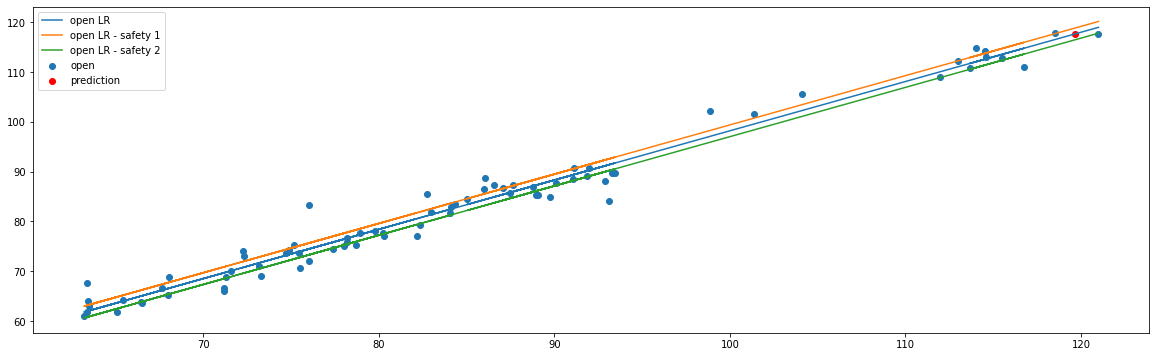

high
	linear model: y =  0.9706 * x +  1.3423 	 R2: 0.9765 	 std error: 0.017
	data numbers (x & y):  77 77
	model_error max 	 9.95
	model_error min 	 0.01
	model_error mean 	 1.71
	model_error median 	 1.22
	model_error std 	 1.64
	model_error 10% 	 0.29
	model_error 25% 	 0.67
	model_error 50% 	 1.22
	model_error 75% 	 2.28
	model_error 90% 	 3.27
	error_gap:  1.18
	 high ref:  119.71 	 high target predicted:  117.53


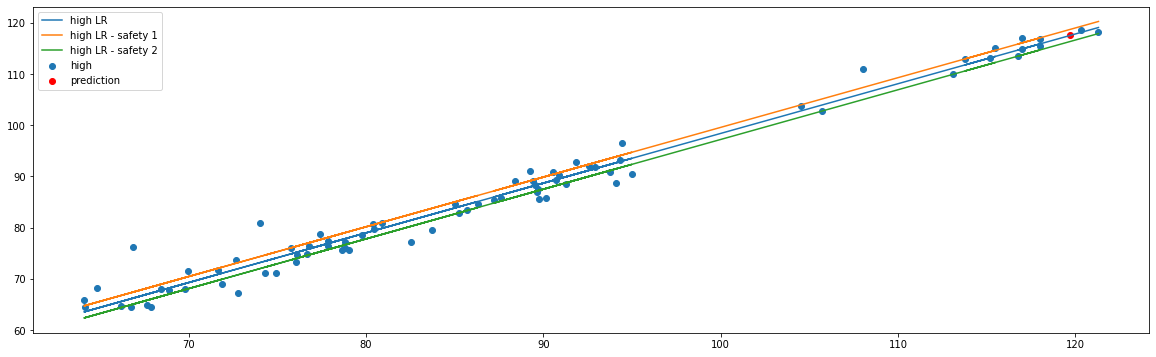

low
	linear model: y =  0.9891 * x +  -0.6817 	 R2: 0.9847 	 std error: 0.014
	data numbers (x & y):  77 77
	model_error max 	 7.22
	model_error min 	 0.02
	model_error mean 	 1.39
	model_error median 	 0.99
	model_error std 	 1.32
	model_error 10% 	 0.17
	model_error 25% 	 0.4
	model_error 50% 	 0.99
	model_error 75% 	 2.13
	model_error 90% 	 3.02
	error_gap:  1.16
	 low ref:  116.81 	 low target predicted:  114.85


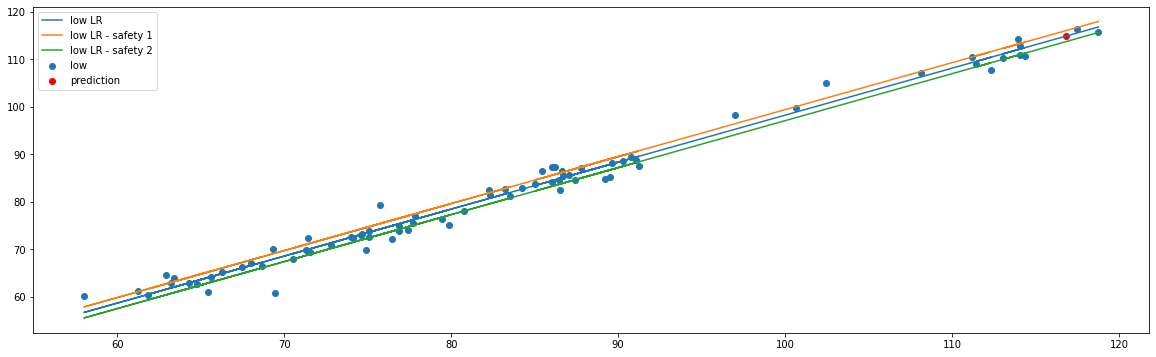

close
	linear model: y =  0.9774 * x +  0.472 	 R2: 0.9736 	 std error: 0.019
	data numbers (x & y):  77 77
	model_error max 	 9.37
	model_error min 	 0.0
	model_error mean 	 1.86
	model_error median 	 1.4
	model_error std 	 1.76
	model_error 10% 	 0.28
	model_error 25% 	 0.71
	model_error 50% 	 1.4
	model_error 75% 	 2.45
	model_error 90% 	 3.73
	error_gap:  1.17
	 close ref:  118.38 	 close target predicted:  116.18


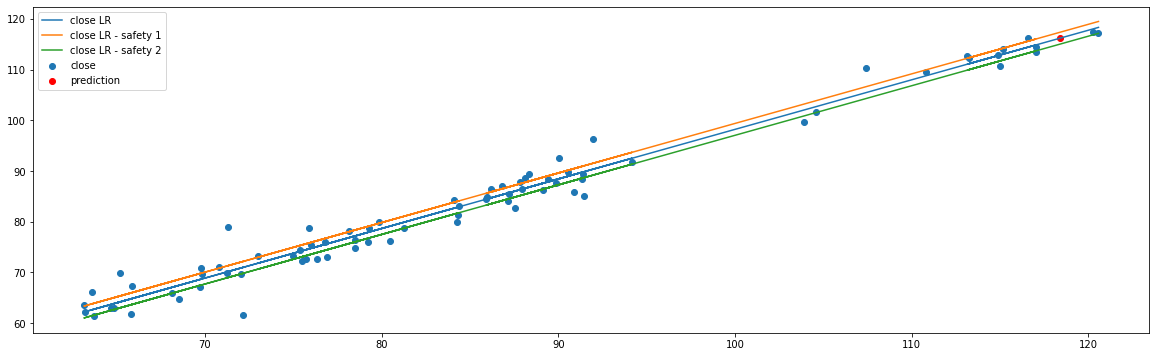

In [31]:
stocks_info = [
    ('BABA', '9988.HK', '2022-11-01', 1),
    ('BIDU', '9888.HK', '2022-10-25', 1),
    ('JD', '9618.HK', '2022-10-24', 0.5 * 7.8),
    ('MPNGY', '3690.HK', '2022-10-24', 0.5 * 7.8),
    ('NTES', '9999.HK', '2022-10-26', 0.2 * 7.8),
    ('LI', '2015.HK', '2022-10-26', 0.5 * 7.8)
]

stocks_info = [ ('BABA', '9988.HK', '2022-11-01', 1) ]

for it in stocks_info[:]:
  # get market data of target-stock & reference-stock
  reference_stock, target_stock, st, ratio = it
  st, et = "2022-10-01", "2023-01-31"
  print("time range:\t", st, "-", et)
  df_data1 = get_df_data(ticker_name=target_stock, start_time=st, end_time=et)
  print("target stock:\t", target_stock, "\t", len(df_data1))
  df_data2 = get_df_data(ticker_name=reference_stock, start_time=st, end_time=et)
  print("reference stock:\t", reference_stock, "\t", len(df_data2))

  # target stock (datetime, open, high, low, close), 1-day previous reference stock (datetime, open, high, low, close) 
  merged_data = merge_stocks(df_data1, df_data2)
  print('model info:')
  print( "\tref_time \t", list(merged_data['ref_time'])[0], "\t", list(merged_data['ref_time'])[-1] )
  print( "\ttarget_time \t", list(merged_data['target_time'])[0], "\t", list(merged_data['target_time'])[-1] )

  # Linear regression to fit data of target-stock & reference-stock
  for label_name in ["open", "high", "low", "close"]:
    print( label_name )
      # model info
    x, y = list(merged_data['ref_' + label_name]), list(merged_data['target_'+label_name])
    k, b, R, std_err, mymodel = LR(x, y)
    error_df = lists_dif(y, mymodel)
    printing01('\tmodel_error '+'max', error_df['model_error'].max())
    printing01('\tmodel_error '+'min', error_df['model_error'].min())
    printing01('\tmodel_error '+'mean', error_df['model_error'].mean())
    printing01('\tmodel_error '+'median', error_df['model_error'].median())
    printing01('\tmodel_error '+'std', error_df['model_error'].std())
    printing01('\tmodel_error '+'10%', error_df['model_error'].quantile(0.1))
    printing01('\tmodel_error '+'25%', error_df['model_error'].quantile(0.25))
    printing01('\tmodel_error '+'50%', error_df['model_error'].quantile(0.5))
    printing01('\tmodel_error '+'75%', error_df['model_error'].quantile(0.75))
    printing01('\tmodel_error '+'90%', error_df['model_error'].quantile(0.9))
      # data visualization
    plt.subplots(figsize=(20, 6))
    plt.scatter(x, y, label=label_name) # points
    plt.plot(x, mymodel, label=label_name+" LR") # model
      # error range
    error_gap = list(merged_data['target_'+label_name])[-1] * 1.0 * 0.01 # 1% error
    error_gap = round(error_gap, 2)
    print( "\terror_gap: ", error_gap )
    plt.plot(x, move_down(mymodel,-error_gap), label=label_name+" LR - safety 1")
    plt.plot(x, move_down(mymodel,error_gap), label=label_name+" LR - safety 2")
      # predict today point
    ref_it = df_data2.iloc[-1]
    ref_dic = {"high":ref_it['High'], "low":ref_it['Low'], "open":ref_it['Open'], "close":ref_it['Close']}
    pred_x =  round(ref_dic[label_name], 2)
    pred_y = k*pred_x+b
    print( "\t", label_name+" ref: ", pred_x, "\t", label_name+" target predicted: ", round(pred_y, 2) )
    plt.scatter([pred_x], [pred_y], label="prediction", color ="red")
    plt.legend()
    plt.show()
